# MLB Salary Prediction (Part 2): EDA and Modeling

Click [here](./data_cleaning.ipynb) to see __Part 1: Data Wrangling__



In [1]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
import seaborn as sns
import numpy as np
import pandas as pd
import csv
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

In [2]:
data_df = pd.read_csv('data/data_cleaned.csv')
data_df.reset_index(drop=False, inplace=True)
data_df.head()

index  IDfg             Name  Age    G    PA    AB    R    H   1B   2B  3B  \
0      0  5677       A.J. Ellis   35  468  1713  1448  143  341  241   63   2   
1      1   746  A.J. Pierzynski   36  664  2587  2424  254  682  479  122   7   
2      2   746  A.J. Pierzynski   35  664  2628  2455  272  695  489  129   7   
3      3   746  A.J. Pierzynski   37  628  2414  2258  222  616  431  112   7   
4      4   746  A.J. Pierzynski   38  613  2347  2191  217  610  429  107   8   

   HR  RBI   BB   SO  HBP  IBB  SB  CS  GDP  SH  SF       AVG       OBP  \
0  35  172  214  311   17   20   2   3   52  19  15  0.235497  0.345391   
1  74  300  101  278   29   21   5   6   76  12  21  0.281353  0.320878   
2  70  290  109  273   28   24   5   5   76  15  21  0.283096  0.324611   
3  66  288   91  280   33   17   4   6   71  10  22  0.272808  0.312681   
4  66  281   95  278   34   17   1   4   73   4  23  0.278412  0.320339   

        SLG       OPS       ISO     BABIP  wRC  wRAA  wRC+   WPA  fWAR  \
0  0.354282  0.699673  0.118785  0.273948  183  -8.4  92.8 -1.46   2.6   
1  0.429043  0.749921  0.147690  0.290492  301   6.0  94.6 -2.58   8.8   
2  0.426884  0.751495  0.143788  0.293015  305   0.0  93.6 -2.85   9.7   
3  0.416298  0.728978  0.143490  0.284385  268  -2.4  90.4 -4.54   5.3   
4  0.424920  0.745259  0.146508  0.290909  274  12.1  96.6 -2.46   5.1   

   Year_FA  seasons_included     Salary  
0     2017                 5  2500000.0  
1     2014                 5   500000.0  
2     2013                 5  7500000.0  
3     2015                 5  2000000.0  
4     2016                 5  3000000.0

## Step 1: Log transform salary data

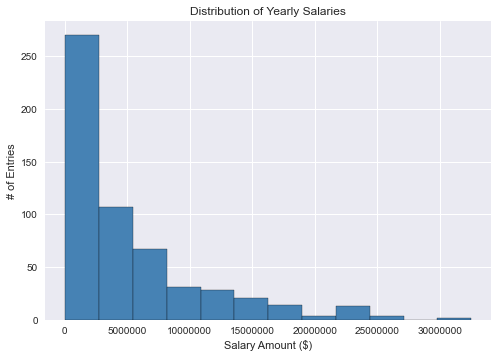

In [3]:
# inspect distribution of yearly salaries
plt.style.use('seaborn')
plt.hist(data_df['Salary'], bins=12, color='steelblue', edgecolor='black')
plt.title('Distribution of Yearly Salaries')
plt.ylabel('# of Entries')
plt.xlabel('Salary Amount ($)')
plt.ticklabel_format(axis='x', useOffset=False, style='plain')

In [4]:
# natural log salaries
data_df.insert(len(data_df.columns), 'Salary_log',np.log(data_df['Salary']))

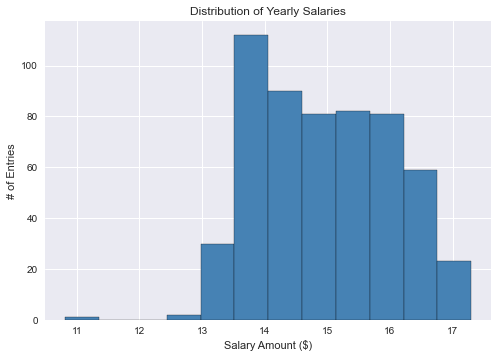

In [5]:
plt.hist(data_df['Salary_log'], bins=12, color='steelblue', edgecolor='black')
plt.title('Distribution of Yearly Salaries')
plt.ylabel('# of Entries')
plt.xlabel('Salary Amount ($)')
plt.show()

In [6]:
data_df.head()

index  IDfg             Name  Age    G    PA    AB    R    H   1B   2B  3B  \
0      0  5677       A.J. Ellis   35  468  1713  1448  143  341  241   63   2   
1      1   746  A.J. Pierzynski   36  664  2587  2424  254  682  479  122   7   
2      2   746  A.J. Pierzynski   35  664  2628  2455  272  695  489  129   7   
3      3   746  A.J. Pierzynski   37  628  2414  2258  222  616  431  112   7   
4      4   746  A.J. Pierzynski   38  613  2347  2191  217  610  429  107   8   

   HR  RBI   BB   SO  HBP  IBB  SB  CS  GDP  SH  SF       AVG       OBP  \
0  35  172  214  311   17   20   2   3   52  19  15  0.235497  0.345391   
1  74  300  101  278   29   21   5   6   76  12  21  0.281353  0.320878   
2  70  290  109  273   28   24   5   5   76  15  21  0.283096  0.324611   
3  66  288   91  280   33   17   4   6   71  10  22  0.272808  0.312681   
4  66  281   95  278   34   17   1   4   73   4  23  0.278412  0.320339   

        SLG       OPS       ISO     BABIP  wRC  wRAA  wRC+   WPA  fWAR  \
0  0.354282  0.699673  0.118785  0.273948  183  -8.4  92.8 -1.46   2.6   
1  0.429043  0.749921  0.147690  0.290492  301   6.0  94.6 -2.58   8.8   
2  0.426884  0.751495  0.143788  0.293015  305   0.0  93.6 -2.85   9.7   
3  0.416298  0.728978  0.143490  0.284385  268  -2.4  90.4 -4.54   5.3   
4  0.424920  0.745259  0.146508  0.290909  274  12.1  96.6 -2.46   5.1   

   Year_FA  seasons_included     Salary  Salary_log  
0     2017                 5  2500000.0   14.731801  
1     2014                 5   500000.0   13.122363  
2     2013                 5  7500000.0   15.830414  
3     2015                 5  2000000.0   14.508658  
4     2016                 5  3000000.0   14.914123

In [7]:
# drop non-essential columns

data_df.drop(columns=['index', 'IDfg', 'Name', 'seasons_included', 'Salary'], inplace=True)

In [8]:
data_df.columns.values

array(['Age', 'G', 'PA', 'AB', 'R', 'H', '1B', '2B', '3B', 'HR', 'RBI',
       'BB', 'SO', 'HBP', 'IBB', 'SB', 'CS', 'GDP', 'SH', 'SF', 'AVG',
       'OBP', 'SLG', 'OPS', 'ISO', 'BABIP', 'wRC', 'wRAA', 'wRC+', 'WPA',
       'fWAR', 'Year_FA', 'Salary_log'], dtype=object)

# Check distribution of all predictors

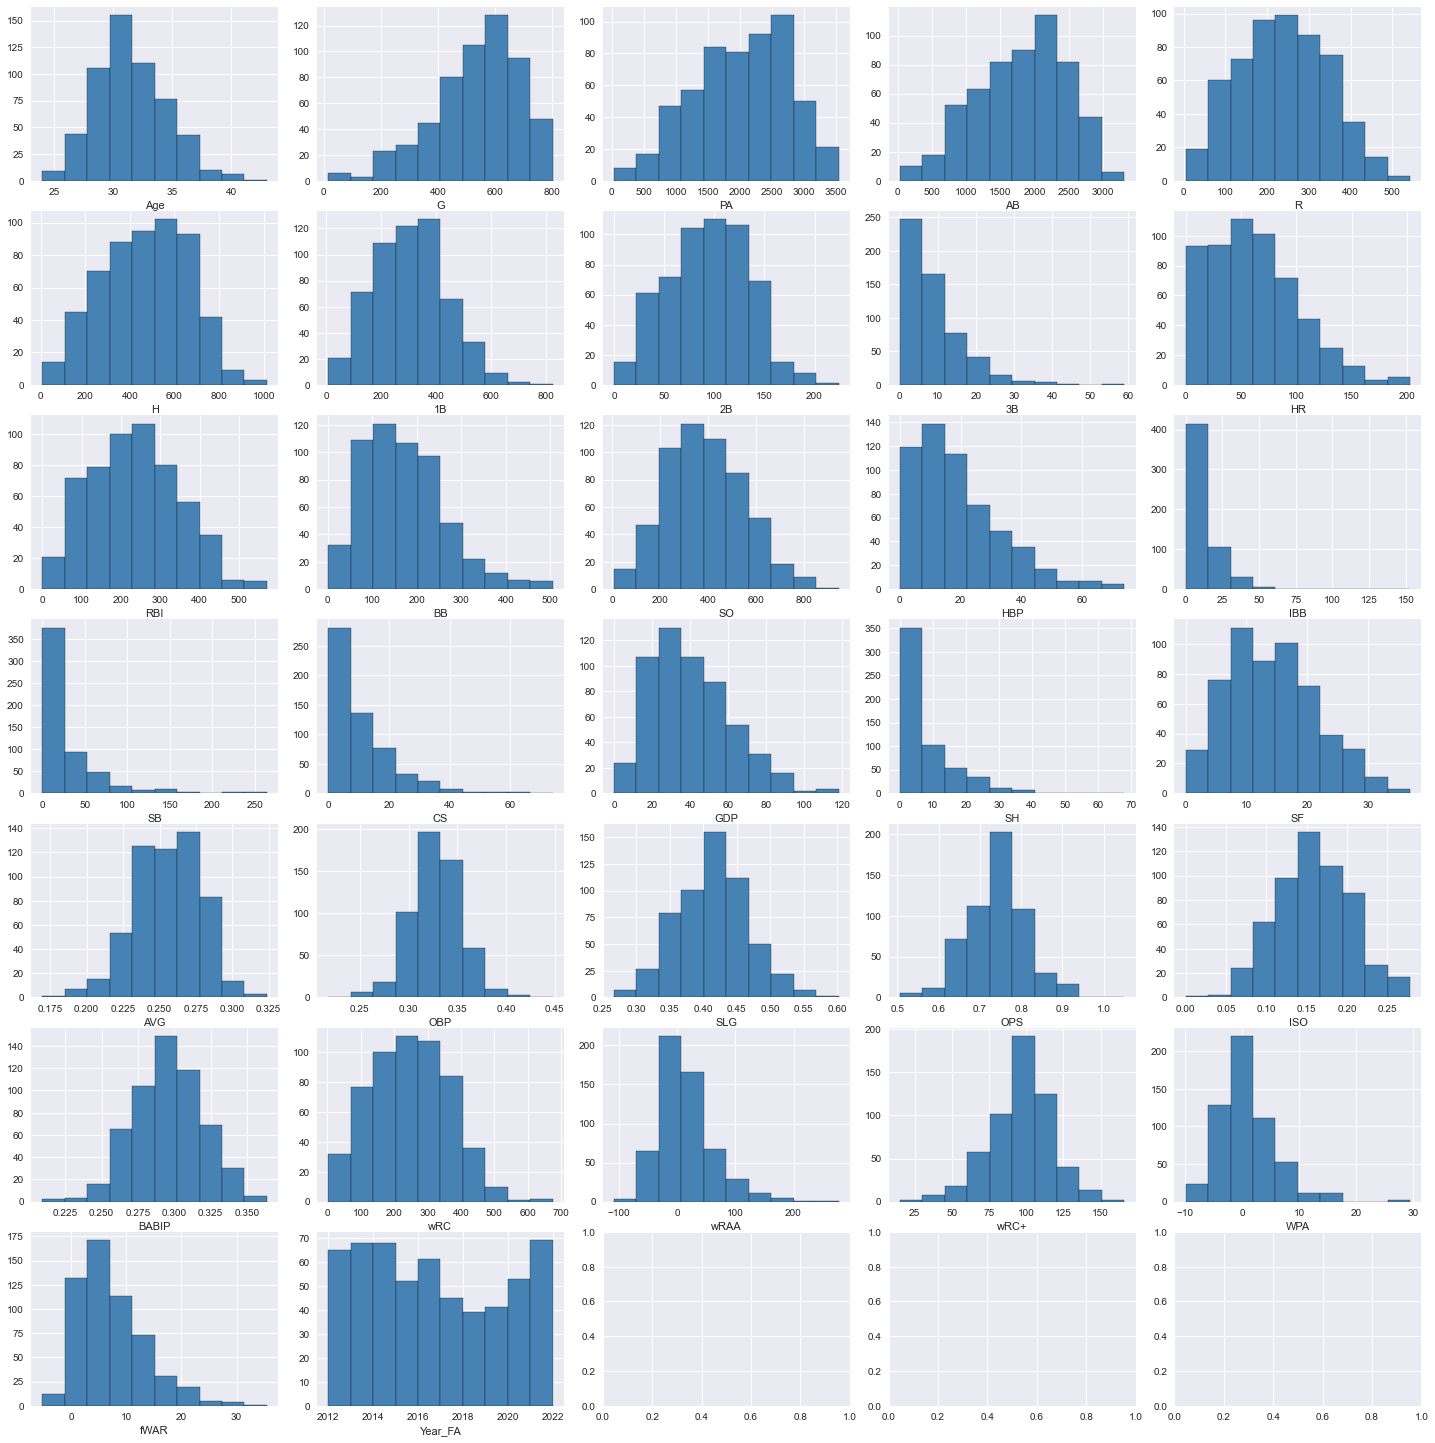

In [9]:
vars = ['Age', 'G', 'PA', 'AB', 'R', 'H', '1B',
       '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'HBP', 'IBB', 'SB', 'CS',
       'GDP', 'SH', 'SF', 'AVG', 'OBP', 'SLG', 'OPS', 'ISO', 'BABIP',
       'wRC', 'wRAA', 'wRC+', 'WPA', 'fWAR', 'Year_FA']
fig, ax = plt.subplots(7, 5)
fig.set_size_inches(20, 20)
fig.tight_layout()
count = 0
for a in range(7):
    for b in range(5):
        try:
            ax[a, b].hist(data_df[vars[count]], color='steelblue', edgecolor='black')
            ax[a, b].set_xlabel(vars[count])
            count += 1
        except:
            pass

# Non-normal vars: 3B, HR, IBB, SB, CS, SH, Year_FA
### Square root them:

In [10]:
data_df.head()

Age    G    PA    AB    R    H   1B   2B  3B  HR  RBI   BB   SO  HBP  IBB  \
0   35  468  1713  1448  143  341  241   63   2  35  172  214  311   17   20   
1   36  664  2587  2424  254  682  479  122   7  74  300  101  278   29   21   
2   35  664  2628  2455  272  695  489  129   7  70  290  109  273   28   24   
3   37  628  2414  2258  222  616  431  112   7  66  288   91  280   33   17   
4   38  613  2347  2191  217  610  429  107   8  66  281   95  278   34   17   

   SB  CS  GDP  SH  SF       AVG       OBP       SLG       OPS       ISO  \
0   2   3   52  19  15  0.235497  0.345391  0.354282  0.699673  0.118785   
1   5   6   76  12  21  0.281353  0.320878  0.429043  0.749921  0.147690   
2   5   5   76  15  21  0.283096  0.324611  0.426884  0.751495  0.143788   
3   4   6   71  10  22  0.272808  0.312681  0.416298  0.728978  0.143490   
4   1   4   73   4  23  0.278412  0.320339  0.424920  0.745259  0.146508   

      BABIP  wRC  wRAA  wRC+   WPA  fWAR  Year_FA  Salary_log  
0  0.273948  183  -8.4  92.8 -1.46   2.6     2017   14.731801  
1  0.290492  301   6.0  94.6 -2.58   8.8     2014   13.122363  
2  0.293015  305   0.0  93.6 -2.85   9.7     2013   15.830414  
3  0.284385  268  -2.4  90.4 -4.54   5.3     2015   14.508658  
4  0.290909  274  12.1  96.6 -2.46   5.1     2016   14.914123

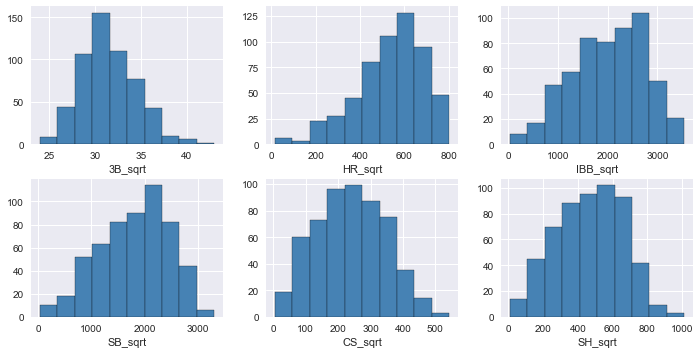

In [11]:
trans_list = ['3B', 'HR', 'IBB', 'SB', 'CS', 'SH']

for i in trans_list:
    data_df[i+'_sqrt'] = data_df[i] ** (1/2)

    
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(10, 5)
fig.tight_layout(pad=1.5)
count = 0
for a in range(2):
    for b in range(3):
        try:
            ax[a, b].hist(data_df[vars[count]], color='steelblue', edgecolor='black')
            ax[a, b].set_xlabel(trans_list[count]+'_sqrt')
            count += 1
        except:
            pass

## Predictors pairplot

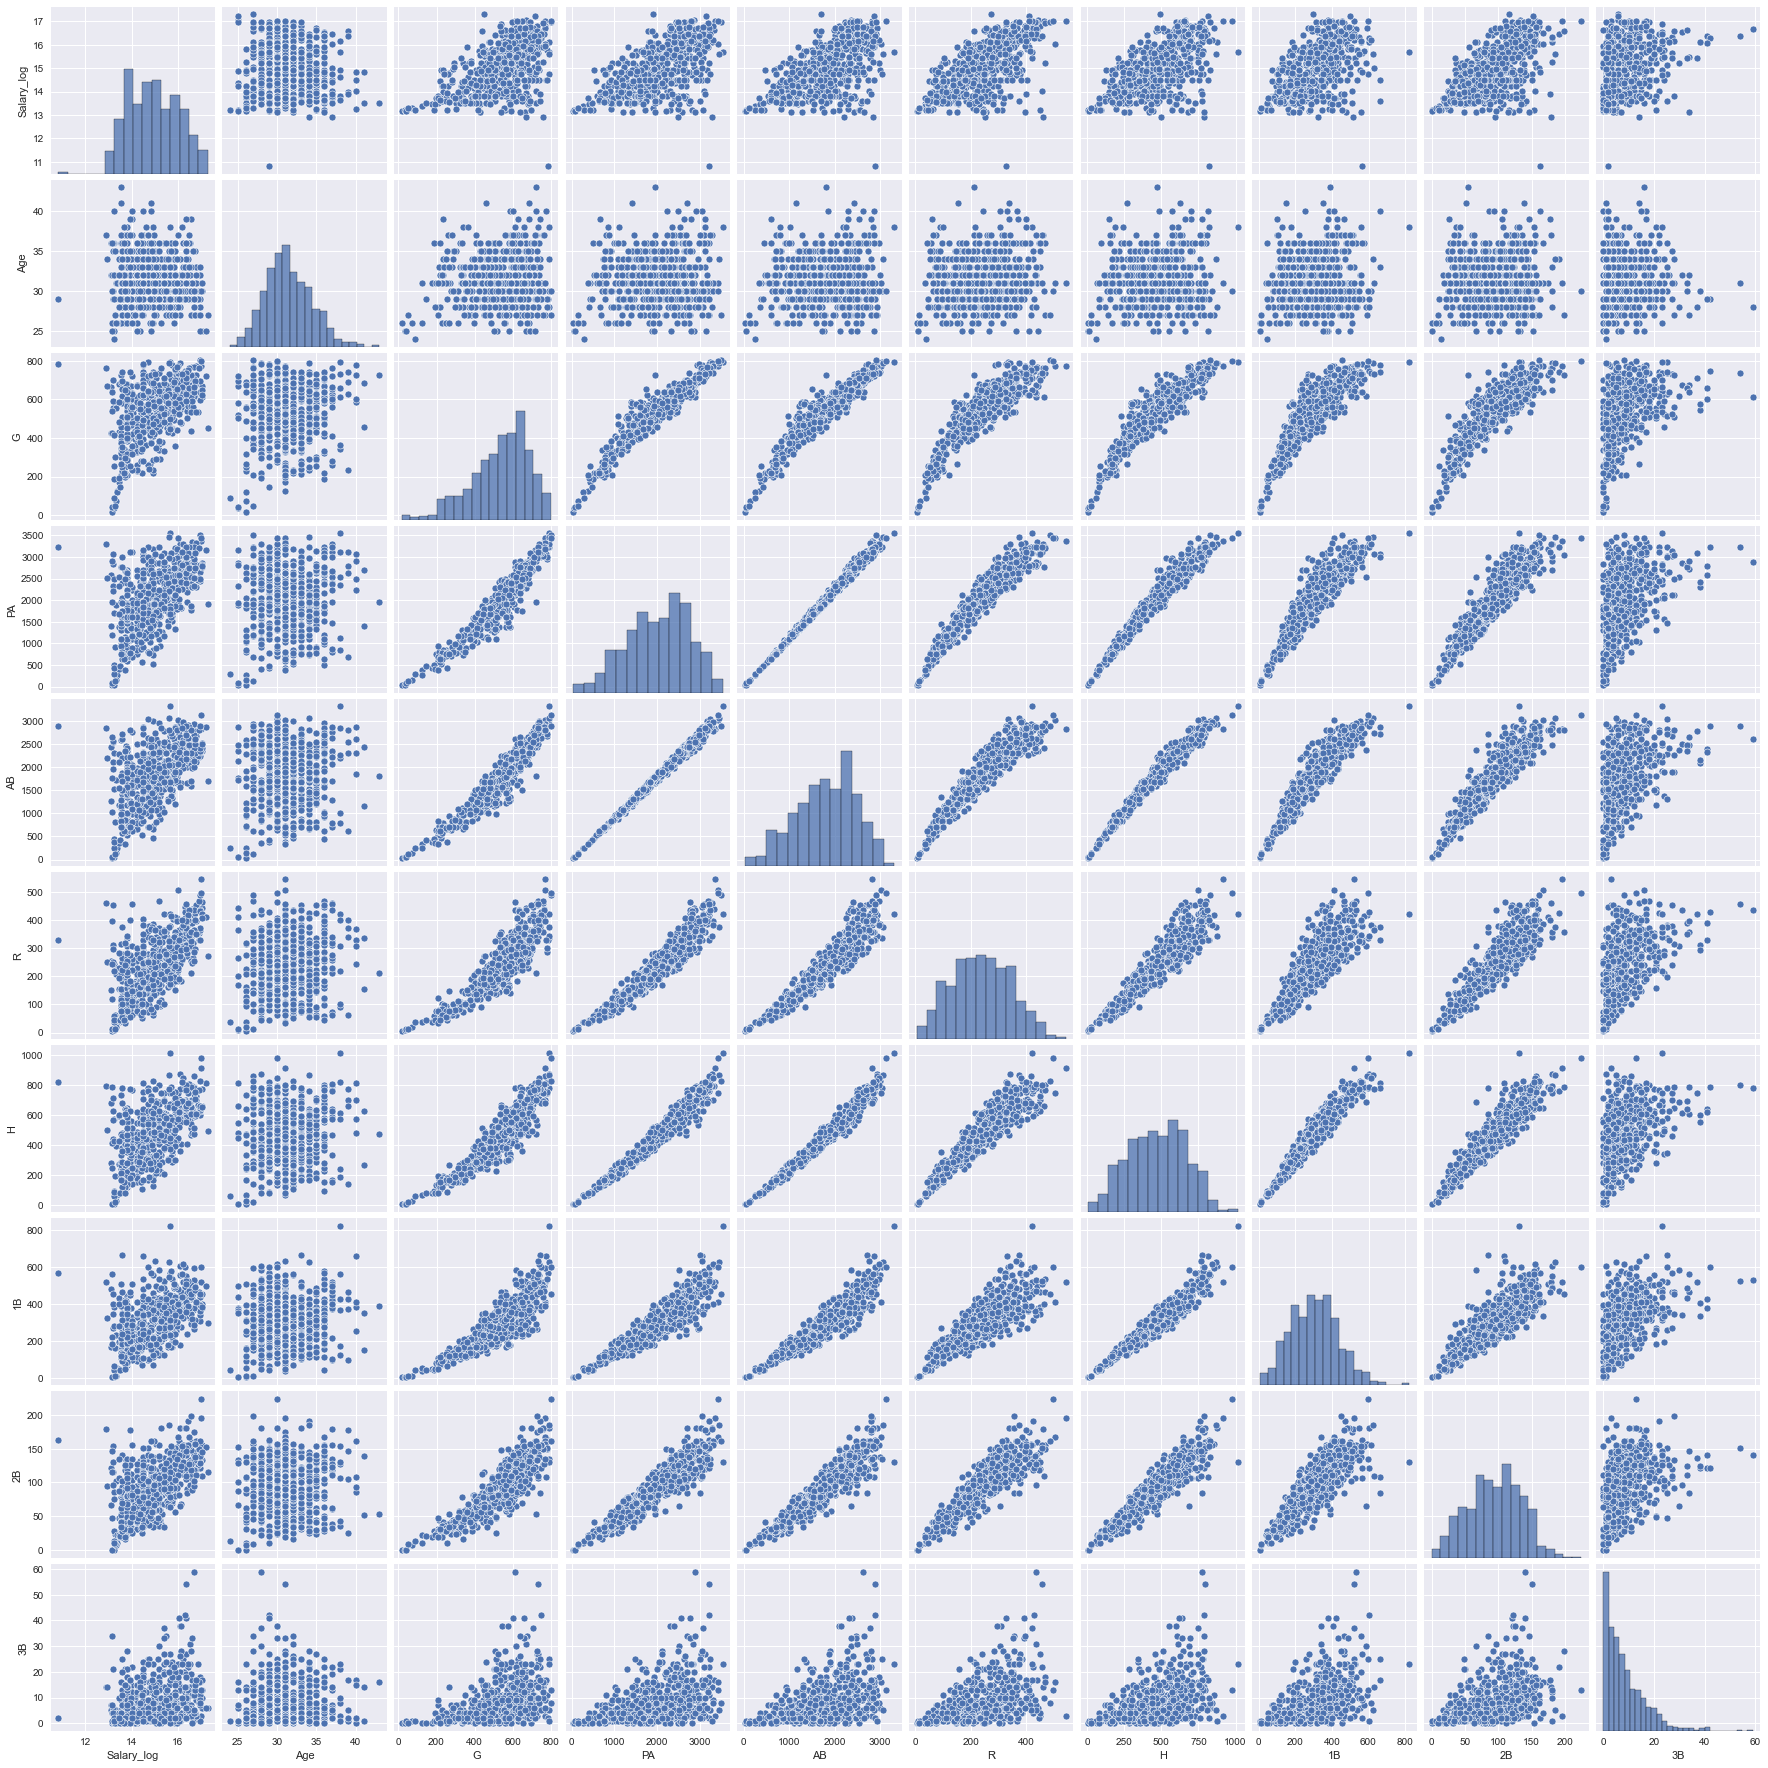

In [12]:
vars1 = ['Salary_log', 'Age', 'G', 'PA', 'AB', 'R', 'H', '1B', '2B', '3B']
vars2 = ['Salary_log', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'GDP', 'HBP']
vars3 = ['Salary_log', 'SH', 'SF', 'IBB', 'AVG', 'OBP', 'SLG', 'Year_FA']
vars4 = ['Salary_log', 'BABIP', 'ISO', 'OPS', 'wRC', 'wRAA', 'wRC+', 'WPA', 'fWAR']

sns.pairplot(data_df,vars=vars1);

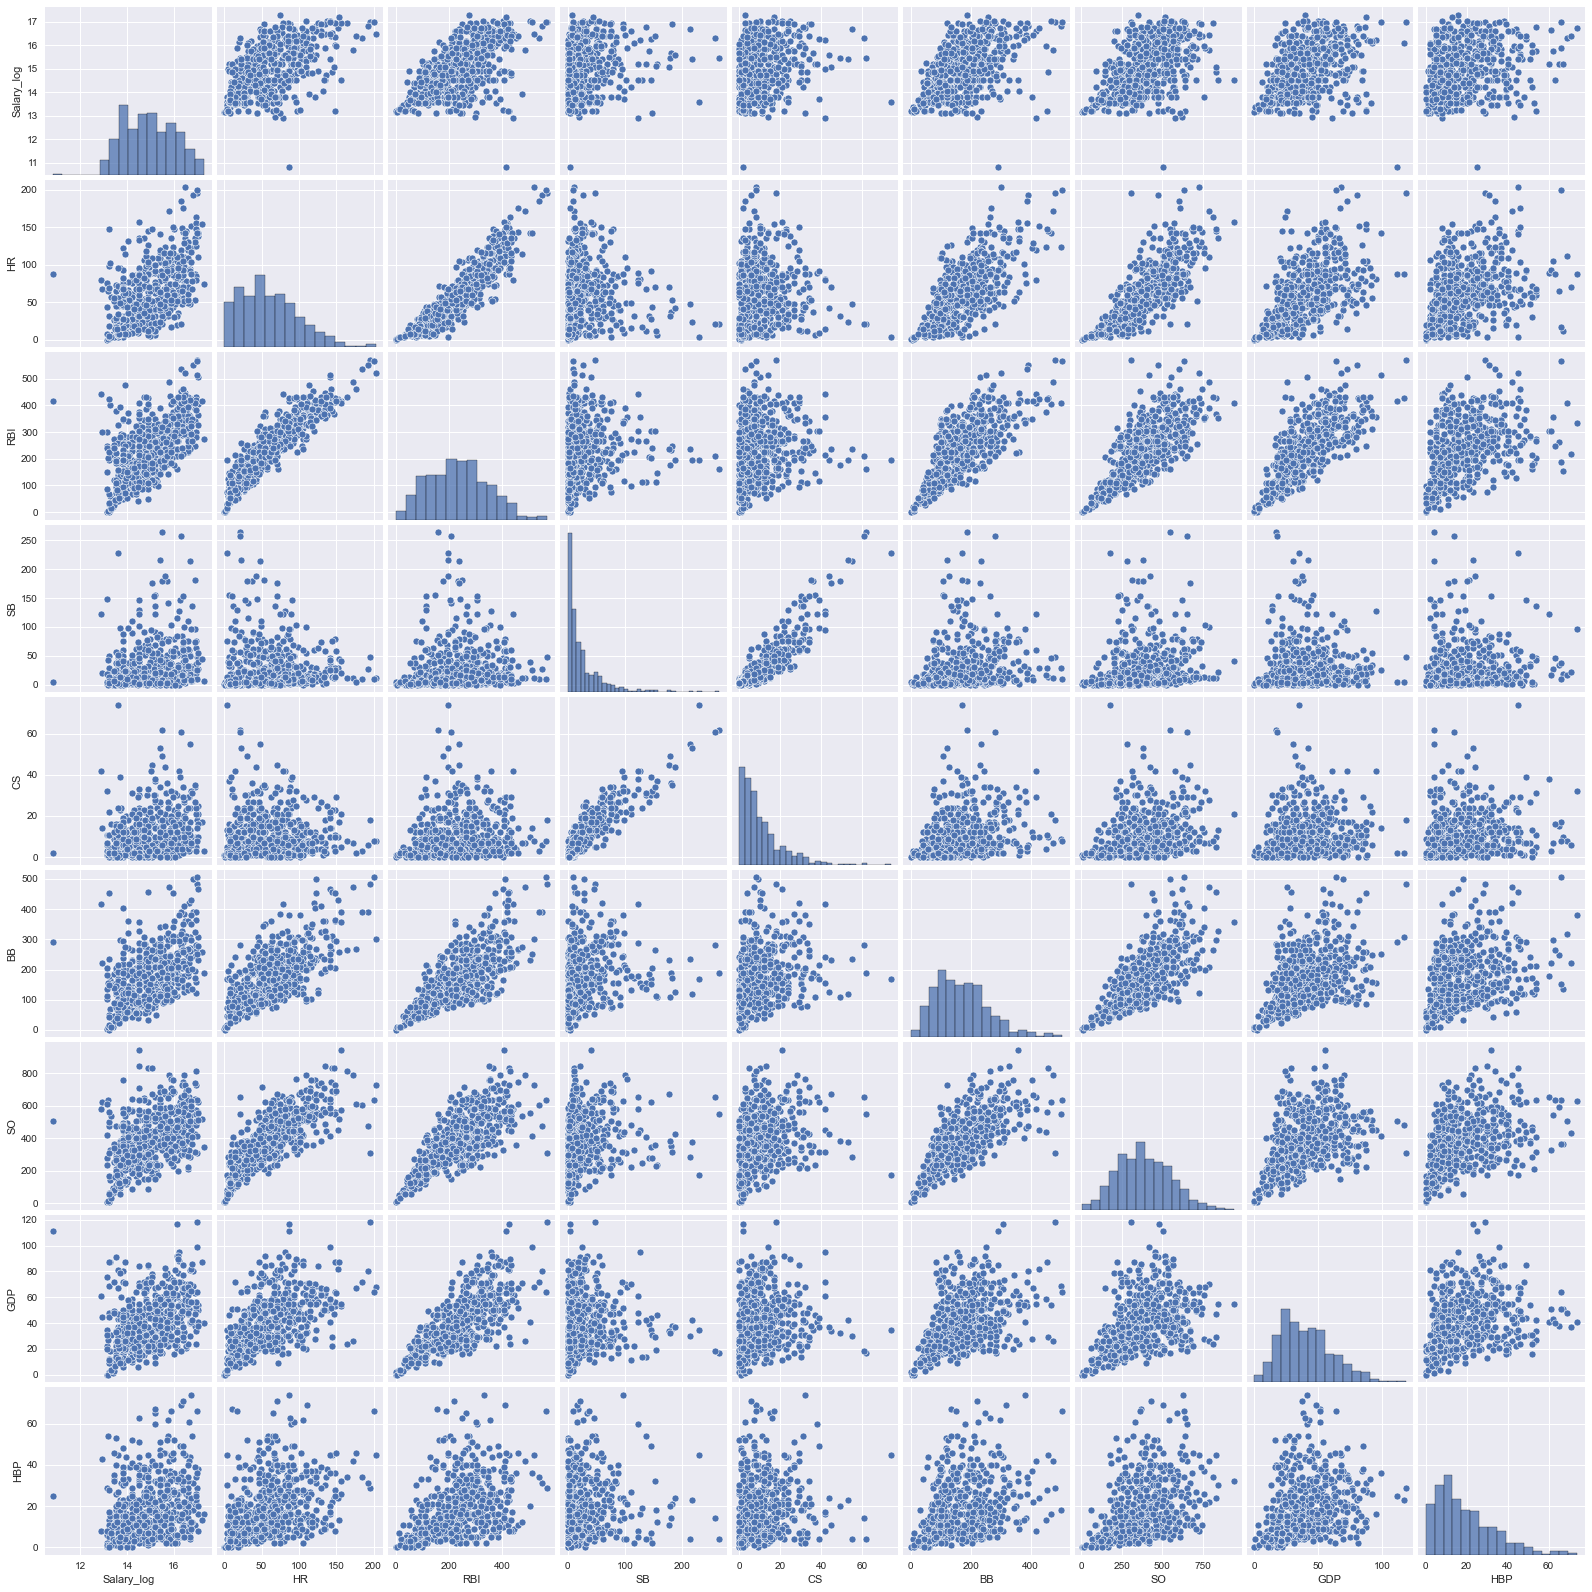

In [13]:
sns.pairplot(data_df,vars=vars2);

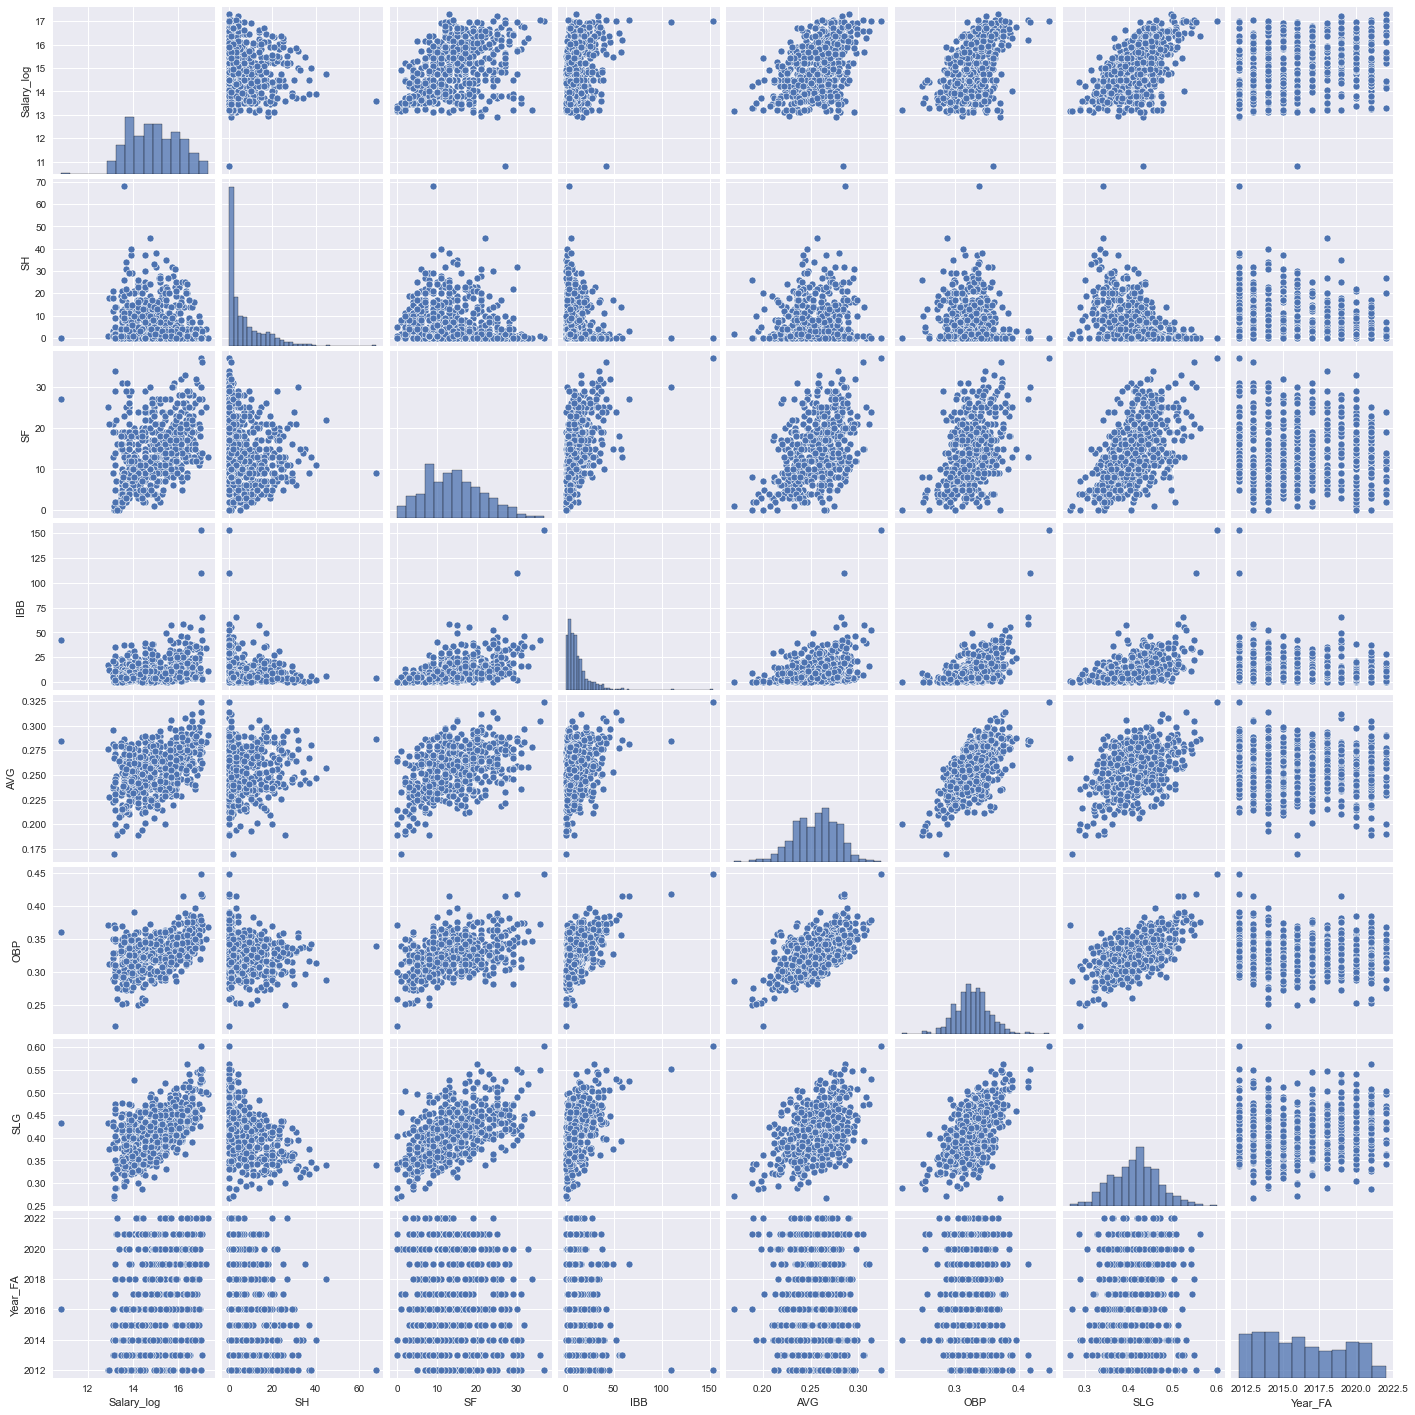

In [14]:
sns.pairplot(data_df,vars=vars3);

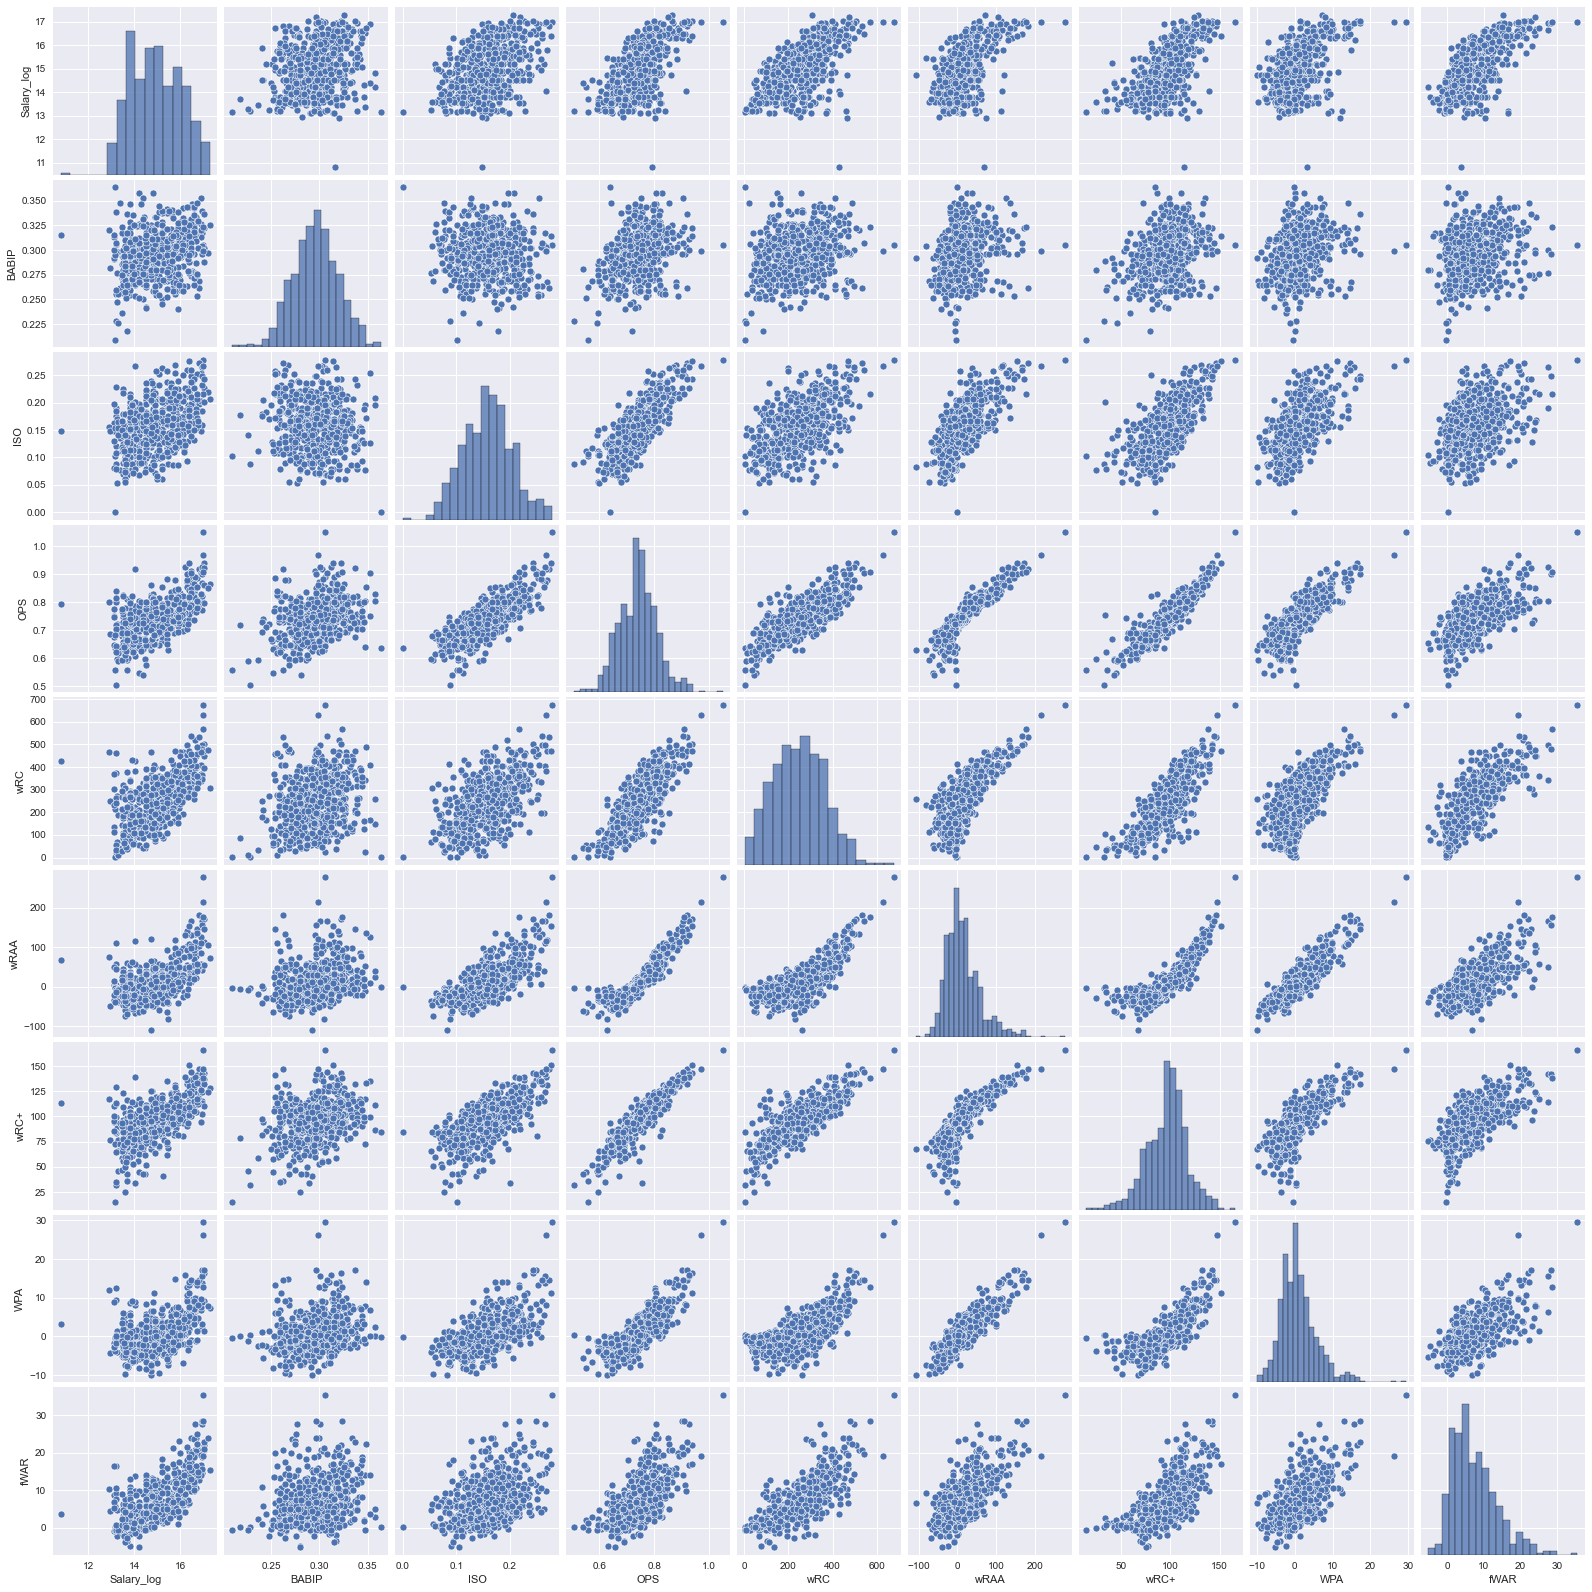

In [15]:
sns.pairplot(data_df,vars=vars4);

# Variable correlation matrix heatmap

In [16]:
data_df.columns.values

array(['Age', 'G', 'PA', 'AB', 'R', 'H', '1B', '2B', '3B', 'HR', 'RBI',
       'BB', 'SO', 'HBP', 'IBB', 'SB', 'CS', 'GDP', 'SH', 'SF', 'AVG',
       'OBP', 'SLG', 'OPS', 'ISO', 'BABIP', 'wRC', 'wRAA', 'wRC+', 'WPA',
       'fWAR', 'Year_FA', 'Salary_log', '3B_sqrt', 'HR_sqrt', 'IBB_sqrt',
       'SB_sqrt', 'CS_sqrt', 'SH_sqrt'], dtype=object)

<AxesSubplot:>

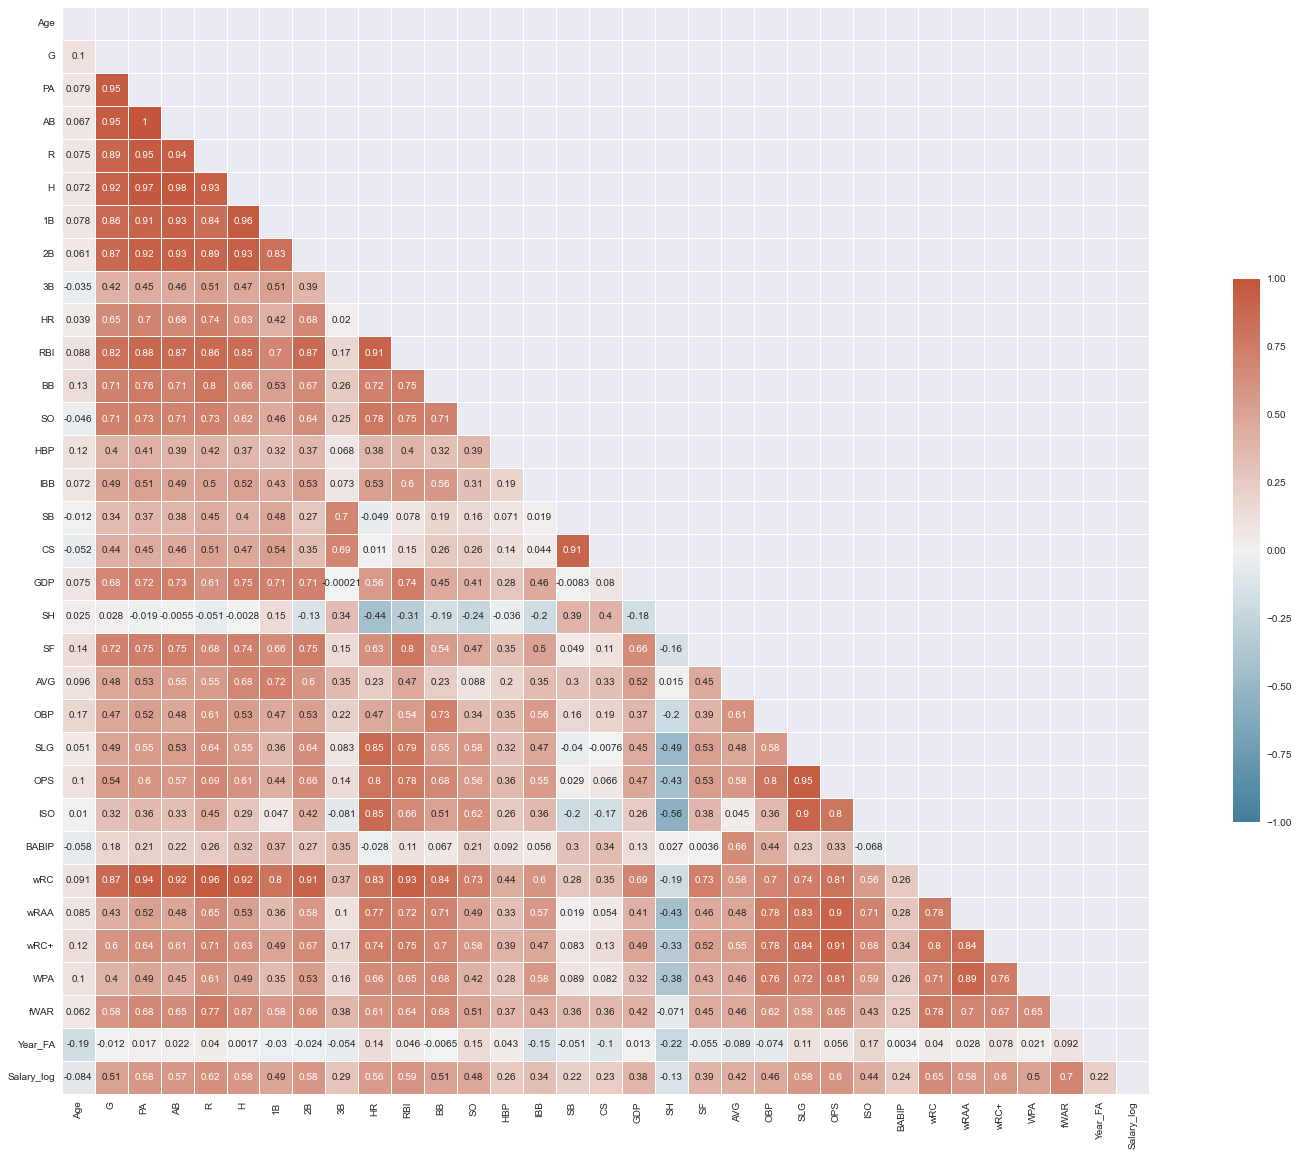

In [17]:
vars_full = ['Age', 'G', 'PA', 'AB', 'R', 'H', '1B',
       '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'HBP', 'IBB', 'SB', 'CS',
       'GDP', 'SH', 'SF', 'AVG', 'OBP', 'SLG', 'OPS', 'ISO', 'BABIP',
       'wRC', 'wRAA', 'wRC+', 'WPA', 'fWAR', 'Year_FA', 'Salary_log']
vars = ['Age', 'G', 'PA', 'AB', 'R', 'H', '1B',
       '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'HBP', 'IBB', 'SB', 'CS',
       'GDP', 'SH', 'SF', 'AVG', 'OBP', 'SLG', 'OPS', 'ISO', 'BABIP',
       'wRC', 'wRAA', 'wRC+', 'WPA', 'fWAR', 'Year_FA']

data_df2 = data_df[vars_full]
# Compute the correlation matrix
corr = data_df2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [18]:
X = data_df[vars]
y = data_df['Salary_log']

In [19]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

/Users/honeybunny/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [20]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Salary_log   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     27.92
Date:                Sun, 23 Jan 2022   Prob (F-statistic):           6.16e-88
Time:                        16:29:41   Log-Likelihood:                -570.42
No. Observations:                 561   AIC:                             1201.
Df Residuals:                     531   BIC:                             1331.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -63.0757     30.663     -2.057      0.0

/Users/honeybunny/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


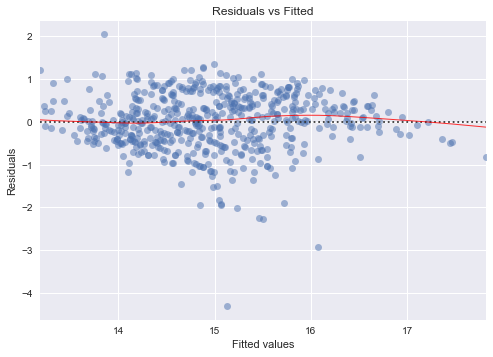

In [21]:
dataframe = pd.concat([X, y], axis=1)

# model values
model_fitted_y = results.fittedvalues
# model residuals
model_residuals = results.resid
# normalized residuals
model_norm_residuals = results.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = results.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = results.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

# Fitting and checking diagnostic plots of individual variables

In [24]:
var_name = 'fWAR'
X = data_df[var_name]
y = data_df['Salary_log']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Salary_log   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     540.9
Date:                Sun, 23 Jan 2022   Prob (F-statistic):           3.31e-84
Time:                        17:06:07   Log-Likelihood:                -640.33
No. Observations:                 561   AIC:                             1285.
Df Residuals:                     559   BIC:                             1293.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0607      0.050    281.118      0.0

/Users/honeybunny/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


/Users/honeybunny/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


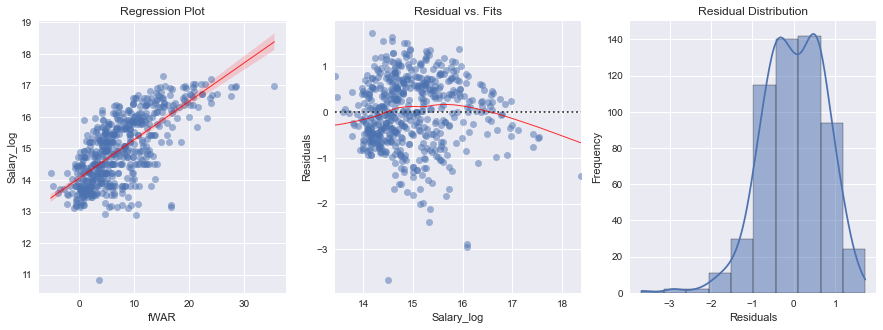

In [26]:
dataframe = pd.concat([X, y], axis=1)

# model values
model_fitted_y = results.fittedvalues
# model residuals
model_residuals = results.resid
# normalized residuals
model_norm_residuals = results.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = results.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = results.get_influence().cooks_distance[0]

fig2, ax2 = plt.subplots(1, 3, figsize=(15,5))
# fig.set_size_inches(10, 10)
fig.tight_layout(pad=1.5)

# sns.set(rc={'figure.figsize':(10,14)})
sns.regplot(x=var_name, y='Salary_log', data=dataframe, ax=ax2[0], 
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax2[0].set(xlabel=var_name, ylabel='Salary_log', title='Regression Plot')

sns.residplot(model_fitted_y, dataframe.columns[-1], ax=ax2[1] , data=dataframe,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax2[1].set(xlabel='Salary_log', ylabel='Residuals', title='Residual vs. Fits')

sns.histplot(data=model_residuals, ax=ax2[2], bins=10, kde=True)
ax2[2].set(xlabel='Residuals', ylabel='Frequency', title='Residual Distribution')
plt.show()

# square transform fWAR with added constant term

In [ ]:
data_df['fWAR2'] = (data_df['fWAR'] + (1-data_df['fWAR'].min())) ** 2
data_df['fWAR2_log'] = np.log(data_df['fWAR2'])

In [ ]:
plt.hist(data_df['fWAR2'], color='steelblue', edgecolor='black')
plt.show()

In [ ]:
X = data_df[['fWAR', 'fWAR2']]
y = data_df['Salary_log']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Check multicollinearity

In [ ]:
df = pd.concat([X, y], axis=1)

# model values
model_fitted_y = results.fittedvalues
# model residuals
model_residuals = results.resid
# normalized residuals
model_norm_residuals = results.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = results.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = results.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=df_war,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
for i in range(32):
    print(f"{vars[i]}: {vif[i]}")
    